In [1]:
pwd

'C:\\Users\\gamal\\Downloads\\ITI Training\\Final Project'

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

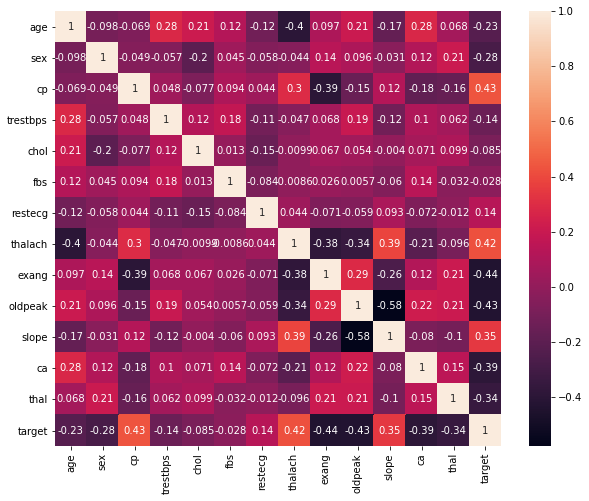

In [11]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr_df = data.corr()
sns.heatmap(corr_df,annot=True)

In [12]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
X = data.drop(columns='target')
y = data['target']

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [18]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[12  4]
 [11 34]]
0.7540983606557377


Naive Bayes
[[15  6]
 [ 8 32]]
0.7704918032786885


RandomForest
[[16  3]
 [ 7 35]]
0.8360655737704918


Decision Tree
[[14  4]
 [ 9 34]]
0.7868852459016393


KNN
[[11  8]
 [12 30]]
0.6721311475409836




In [19]:
# Random_Forest Best one
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [21]:
print(confusion_matrix(predictions, y_test))

[[11  8]
 [12 30]]


In [22]:
score=accuracy_score(y_test,y_pred)
score

0.8360655737704918

In [25]:
import os
from os.path import isfile
file_name = 'heart_disease.pickle'
top_acc = 0
if not isfile(file_name):
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        model.fit(X_train, y_train)        

        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        print('Current Accuracy : ', acc)
        if acc > top_acc:
            top_acc = acc
            with open(file_name, 'wb') as file:
                pickle.dump(model, file)
            
else:
    with open(file_name, 'rb') as file:
            model = pickle.load(file)    

Current Accuracy :  0.8688524590163934
Current Accuracy :  0.8360655737704918
Current Accuracy :  0.7377049180327869
Current Accuracy :  0.8032786885245902
Current Accuracy :  0.7377049180327869
Current Accuracy :  0.7704918032786885
Current Accuracy :  0.8360655737704918
Current Accuracy :  0.819672131147541
Current Accuracy :  0.819672131147541
Current Accuracy :  0.8360655737704918
Current Accuracy :  0.8032786885245902
Current Accuracy :  0.819672131147541
Current Accuracy :  0.819672131147541
Current Accuracy :  0.8360655737704918
Current Accuracy :  0.819672131147541
Current Accuracy :  0.7868852459016393
Current Accuracy :  0.819672131147541
Current Accuracy :  0.819672131147541
Current Accuracy :  0.7704918032786885
Current Accuracy :  0.8688524590163934
Current Accuracy :  0.8524590163934426
Current Accuracy :  0.7540983606557377
Current Accuracy :  0.8360655737704918
Current Accuracy :  0.819672131147541
Current Accuracy :  0.7868852459016393
Current Accuracy :  0.78688524590

In [26]:
top_acc

0.8852459016393442